In [137]:
import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
import numpy as np
import math
import seaborn as sns
sns.set(rc={'figure.figsize': (10, 10)})
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
%matplotlib inline

In [73]:
df = pd.read_csv('C:\\Users\\samhe\\OneDrive\\Documents\\IOD\\mini project\\weatherAUS.csv')

In [74]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [75]:
df.columns = df.columns.str.lower()

In [76]:
df.tail()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [23]:
df.shape

(145460, 23)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           145460 non-null  object 
 1   location       145460 non-null  object 
 2   mintemp        143975 non-null  float64
 3   maxtemp        144199 non-null  float64
 4   rainfall       142199 non-null  float64
 5   evaporation    82670 non-null   float64
 6   sunshine       75625 non-null   float64
 7   windgustdir    135134 non-null  object 
 8   windgustspeed  135197 non-null  float64
 9   winddir9am     134894 non-null  object 
 10  winddir3pm     141232 non-null  object 
 11  windspeed9am   143693 non-null  float64
 12  windspeed3pm   142398 non-null  float64
 13  humidity9am    142806 non-null  float64
 14  humidity3pm    140953 non-null  float64
 15  pressure9am    130395 non-null  float64
 16  pressure3pm    130432 non-null  float64
 17  cloud9am       89572 non-null

In [31]:
df['mintemp'].isnull().sum()

1485

In [26]:
df['maxtemp'].isnull().sum()

1261

In [32]:
df['mintemp'].unique()

array([13.4,  7.4, 12.9,  9.2, 17.5, 14.6, 14.3,  7.7,  9.7, 13.1, 15.9,
       12.6,  8.4,  9.8, 14.1, 13.5, 11.2, 11.5, 17.1, 20.5, 15.3, 16.2,
       16.9, 20.1, 19.7, 12.5, 12. , 11.3,  9.6, 10.5, 12.3, 13.7, 16.1,
       14. , 17. , 17.3, 17.2, 17.4, 19.8, 14.9, 13.9, 18.6, 19.3, 24.4,
       18.8, 20.8, 15.7, 18.5, 20.4, 21.8, 22.3, 22. , 28. , 21.5, 21.7,
       23.5, 28.3, 18.4, 12.4, 13.3, 18. , 18.7, 15.5,  8.9, 15. , 15.4,
       16. , 12.8, 13.2, 13.8,  7.6,  8.3, 11. , 20.9, 16.4, 10. ,  8.8,
        9.3, 14.4, 10.8, 10.1,  9.1, 10.4, 12.2, 10.7,  7.8,  8.1,  7.5,
        8.2, 11.6, 13. ,  9.9,  3.5,  6.6,  7. ,  5.7,  6.2,  6. , 10.6,
        8.6,  4.5,  5.4,  2.1,  1.8,  7.2,  4.6,  4.2,  5.2,  4.1,  3.2,
        4.3,  3.7,  3.6,  6.9, 10.3,  3. ,  2.6,  5.1,  4.4,  4.7,  6.7,
        8. ,  2.2,  1.7,  2.8,  9. ,  6.3, -2. , -1.3,  2. ,  0.5,  1.2,
        0.6,  0.9,  5. ,  3.9,  3.4,  0. , -1.5, -1.7, -0.4,  0.1,  4.8,
        5.9,  2.9, -0.6, -0.3, -1. ,  0.8, -0.1,  1

In [77]:
df[df['mintemp'].isna()]


,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
284,2009-09-11,Albury,NaN,18.8,NaN,NaN,NaN,N,31.0,SE,NNE,7.0,19.0,83.0,46.0,1022.2,1018.2,NaN,NaN,8.7,18.1,NaN,No
444,2010-02-18,Albury,NaN,31.2,NaN,NaN,NaN,ESE,31.0,SSE,SSW,7.0,7.0,33.0,24.0,1020.4,1019.1,NaN,NaN,21.0,30.0,NaN,No
453,2010-02-27,Albury,NaN,26.3,NaN,NaN,NaN,NE,26.0,SE,E,9.0,13.0,70.0,62.0,1019.4,1018.3,2.0,2.0,20.8,24.8,NaN,Yes
459,2010-03-05,Albury,NaN,22.3,0.0,NaN,NaN,NE,37.0,NE,NE,24.0,17.0,74.0,93.0,1008.8,1006.6,8.0,8.0,20.9,20.1,No,Yes
612,2010-08-05,Albury,NaN,11.8,NaN,NaN,NaN,WSW,28.0,N,WNW,2.0,19.0,97.0,65.0,1019.5,1018.3,7.0,4.0,6.7,11.3,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144324,2014-05-17,Uluru,NaN,27.2,NaN,NaN,NaN,NE,19.0,SE,NE,11.0,11.0,43.0,29.0,1020.6,1017.4,NaN,NaN,17.4,25.8,NaN,NaN
144325,2014-05-18,Uluru,NaN,29.1,NaN,NaN,NaN,ESE,24.0,ESE,SSE,9.0,4.0,48.0,27.0,1019.8,1016.9,NaN,NaN,20.5,28.3,NaN,NaN
144326,2014-05-19,Uluru,NaN,28.4,NaN,NaN,NaN,E,24.0,SE,NE,9.0,9.0,52.0,29.0,1020.2,1017.1,6.0,NaN,18.9,27.7,NaN,No
144925,2016-01-08,Uluru,NaN,39.0,0.0,NaN,NaN,NaN,NaN,ENE,NE,26.0,20.0,19.0,12.0,1013.0,1009.7,NaN,8.0,33.1,37.7,No,NaN


In [39]:
#df.drop(df[df['mintemp']=='NaN'])

C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


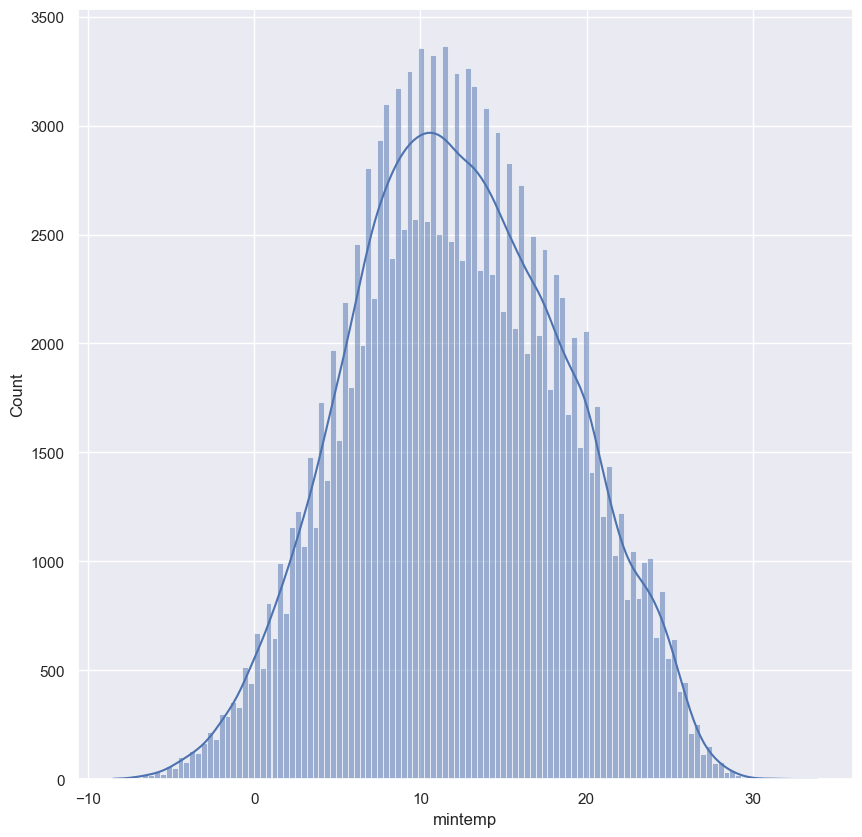

In [40]:
sns.histplot(df.mintemp,kde = True)
plt.show()

C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


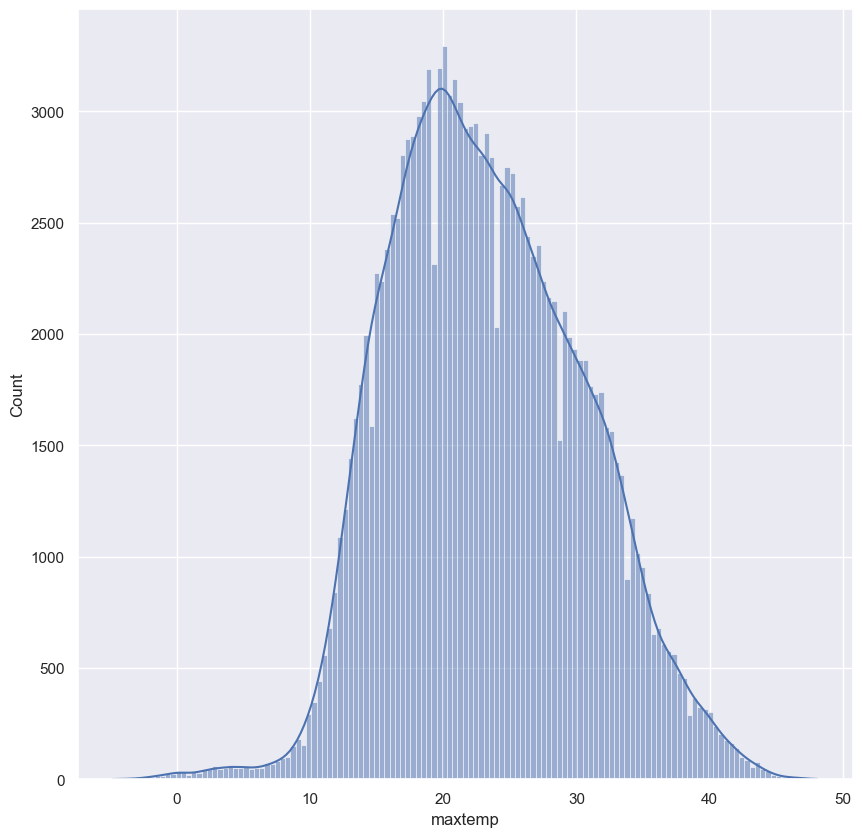

In [41]:
sns.histplot(df.maxtemp,kde = True)
plt.show()

C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


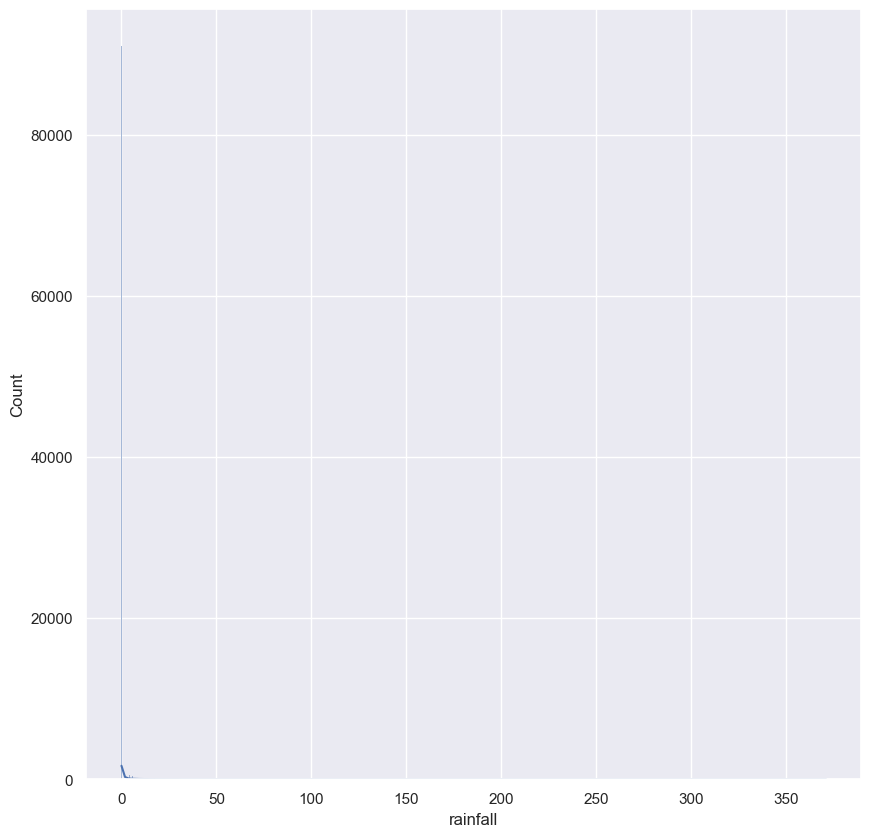

In [42]:
sns.histplot(df.rainfall,kde = True)
plt.show()

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mintemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
maxtemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
windgustspeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
windspeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
windspeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [47]:
df.corr(numeric_only=True)

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm
mintemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
maxtemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
windgustspeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
windspeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
windspeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [78]:
mintemp_s=df['mintemp']
rainfall_s = df['rainfall']

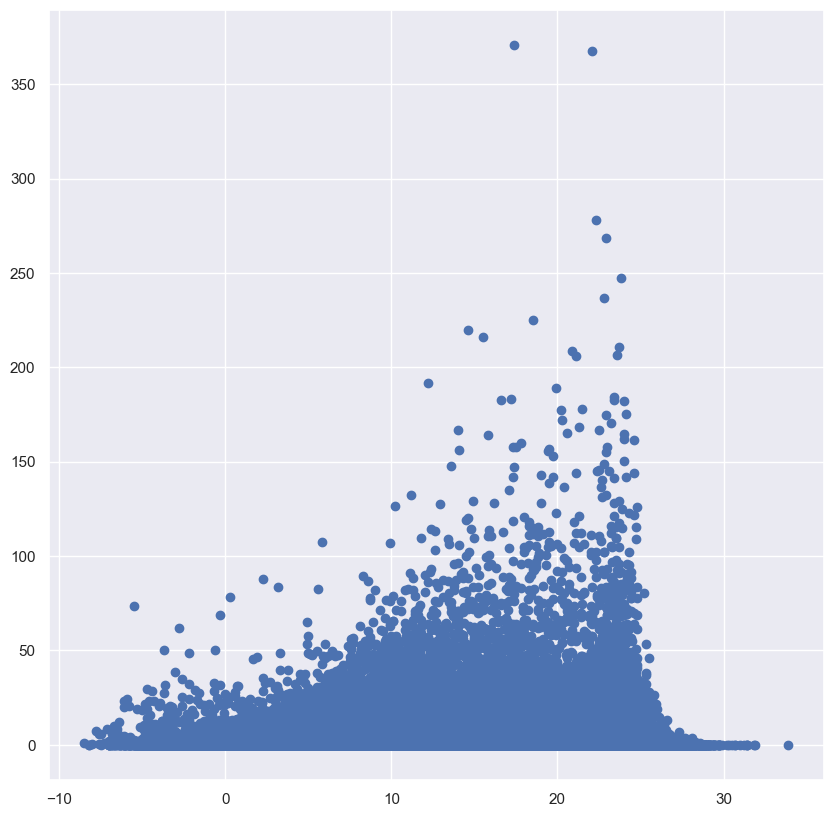

In [56]:
plt.scatter(mintemp_s,rainfall_s)
plt.show()

In [58]:
mean_temp = (df['mintemp']+df['maxtemp'])/2
rainfall_s = df['rainfall']

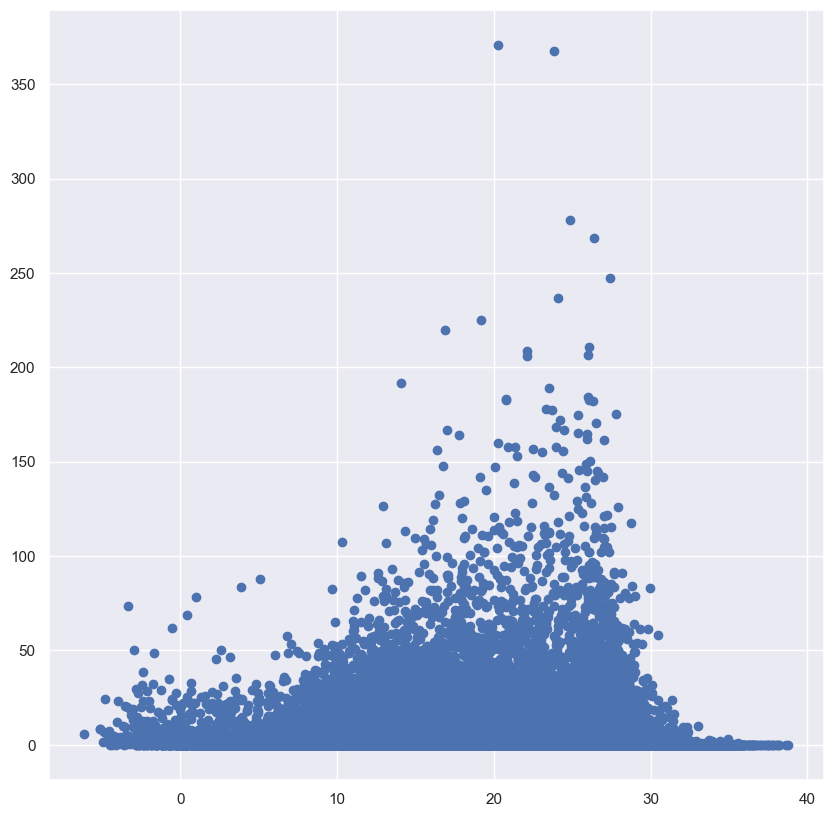

In [59]:
plt.scatter(mean_temp,rainfall_s)
plt.show()

In [85]:
clean_data= df.dropna(subset=['mintemp'])
clean_data                    

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [80]:
clean_data.tail()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [81]:
clean_data.mintemp.isna().sum()

0

In [82]:
clean_data.maxtemp.isna().sum()

396

In [86]:
clean_data= clean_data.dropna(subset=['maxtemp'])

In [87]:
clean_data.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [88]:
clean_data.maxtemp.isna().sum()

0

In [89]:
clean_data.rainfall.isna().sum()

2249

In [97]:
#clean_data.rainfall.unique()

In [93]:
clean_data= clean_data.dropna(subset=['rainfall'])

In [94]:
clean_data.rainfall.isna().sum()

0

In [105]:
clean_data['mean_temp_cd'] = (clean_data['mintemp']+clean_data['maxtemp'])/2

In [106]:
clean_data.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,mean_temp_cd
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,18.15
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,16.25
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,19.30
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,18.60
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,24.90


In [142]:
clean_data.location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [113]:
clean_data.raintoday.unique()

array(['No', 'Yes'], dtype=object)

In [115]:
clean_data.raintoday.isna().sum()

0

In [96]:
#clean_data.info()

In [107]:
mean_temp_cd = clean_data['mean_temp_cd']
rainfall_cd = clean_data['rainfall']

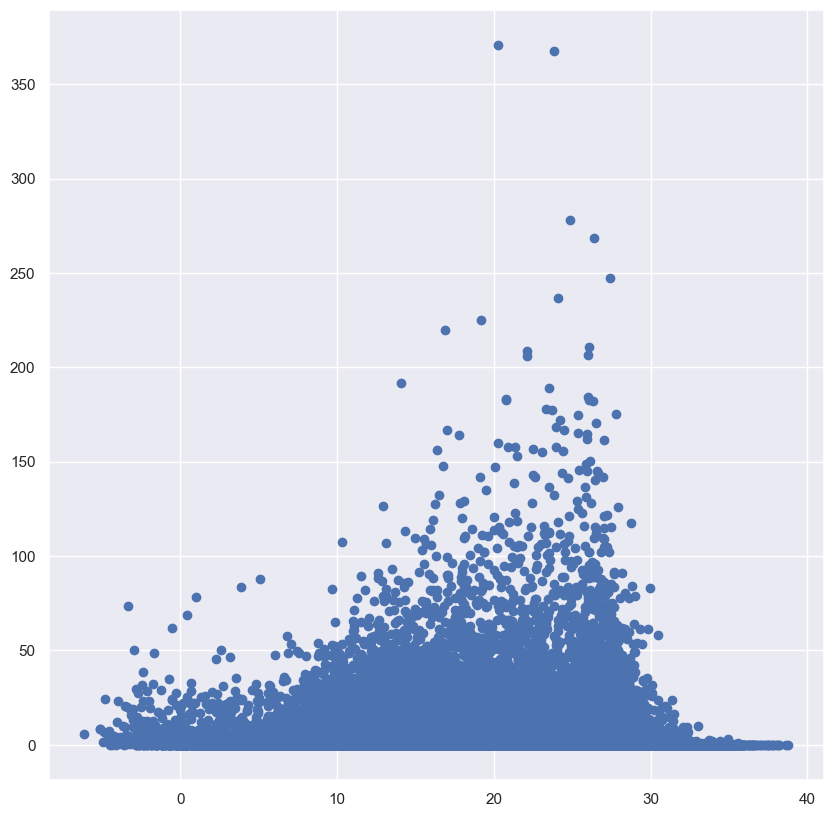

In [108]:
plt.scatter(mean_temp_cd,rainfall_cd)
plt.show()

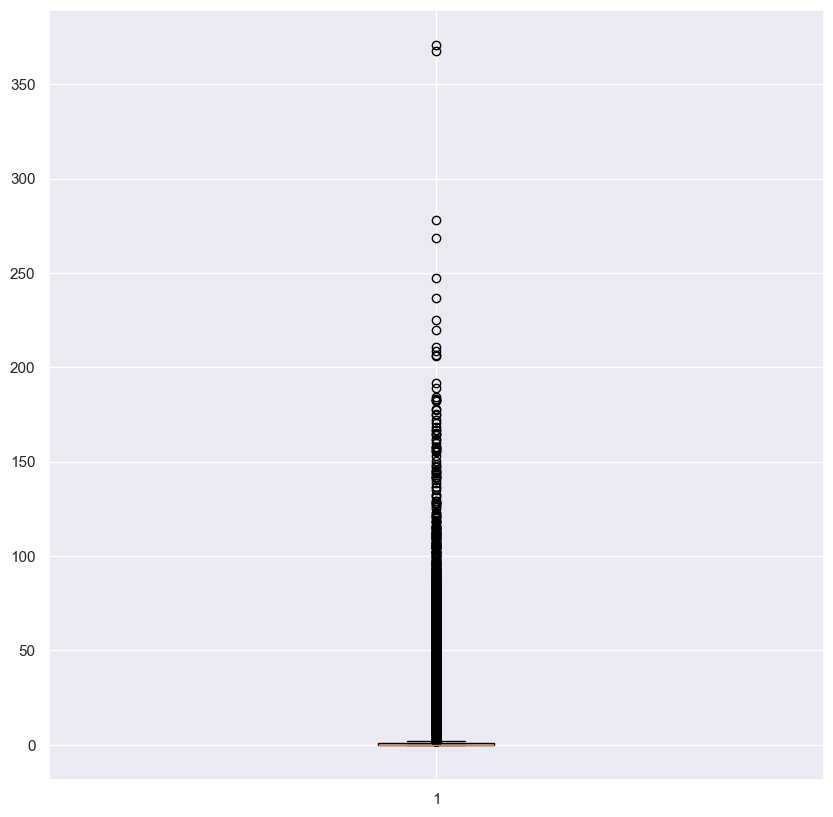

In [102]:
plt.boxplot(rainfall_cd,data=clean_data)
plt.show()

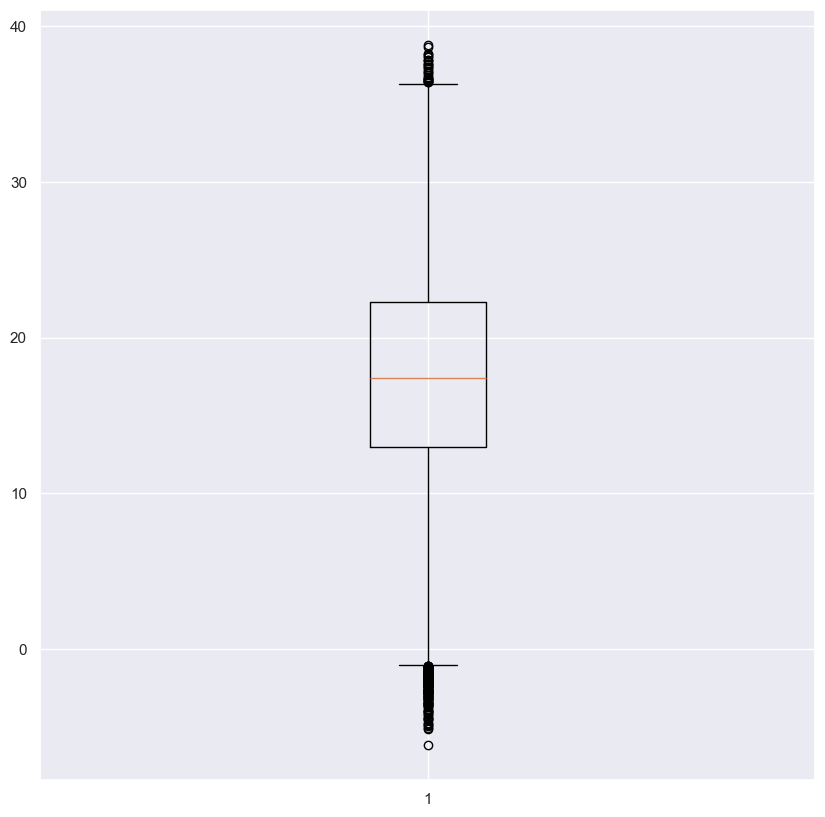

In [109]:
plt.boxplot(mean_temp_cd,data=clean_data)
plt.show()

C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


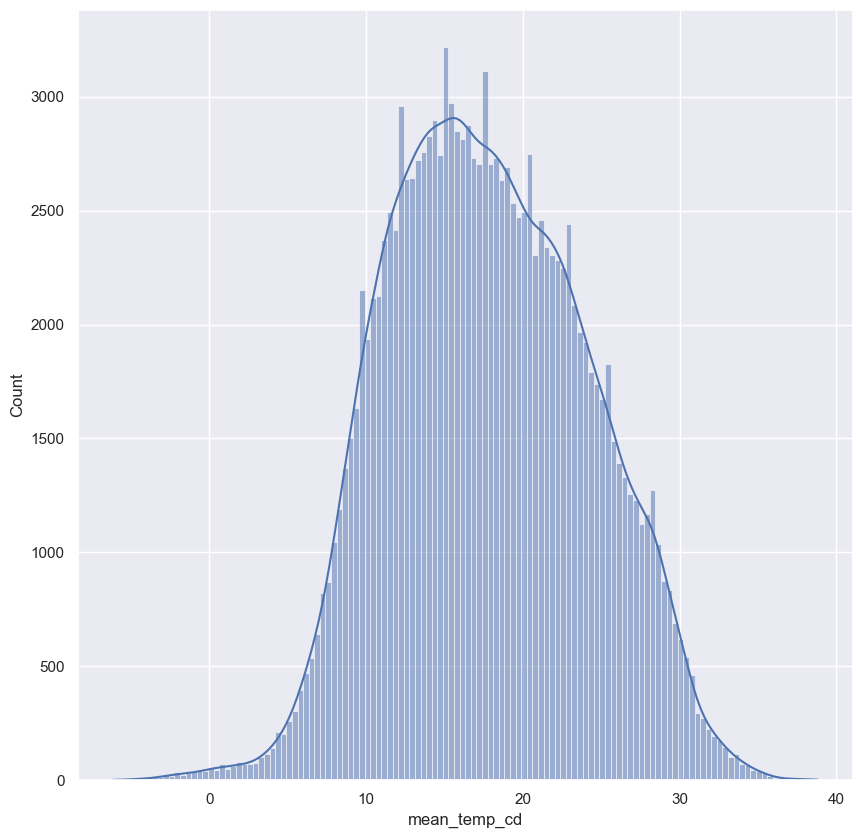

In [119]:
sns.histplot(clean_data.mean_temp_cd,kde = True)
plt.show()

In [117]:
clean_data.head(1)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,mean_temp_cd
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,18.15


In [121]:
clean_data.raintoday.unique()

array(['No', 'Yes'], dtype=object)

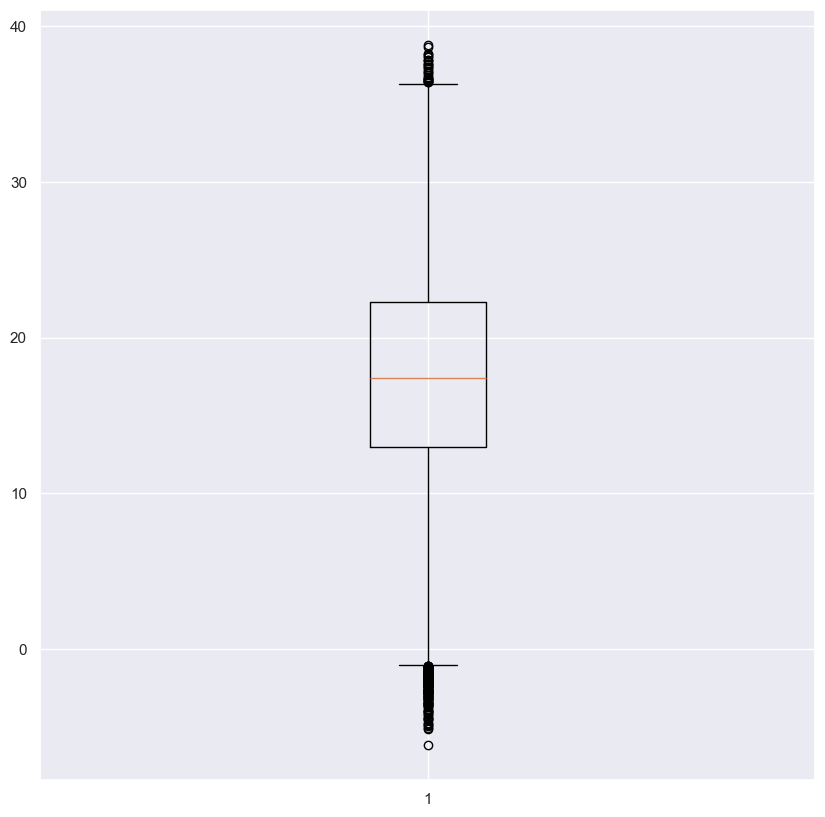

In [123]:
plt.boxplot(mean_temp_cd,data=clean_data)
plt.show()

In [124]:
grouped_data = clean_data.groupby('raintoday')['mean_temp_cd']
summary_stats = grouped_data.describe() 
summary_stats

,count,mean,std,min,25%,50%,75%,max
raintoday,,,,,,,,
No,109654.0,18.047801,6.339374,-4.50,13.3,17.85,22.65,38.80
Yes,31676.0,16.522708,6.017128,-6.15,12.1,15.80,20.80,34.95


C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

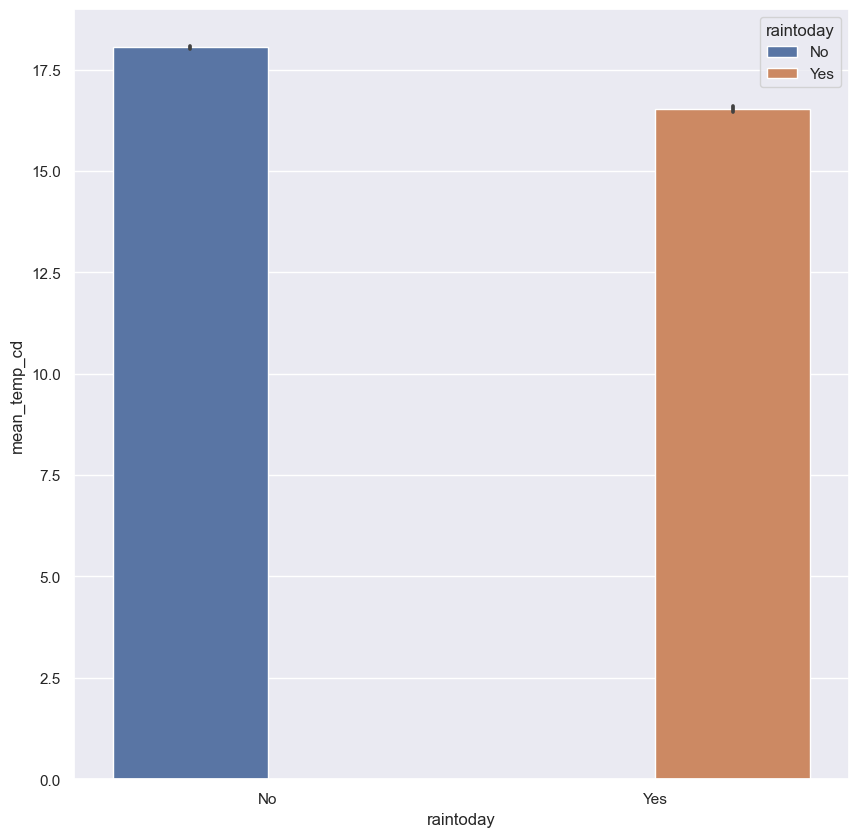

In [126]:
sns.barplot(clean_data, x="raintoday", y="mean_temp_cd", hue="raintoday")
plt.show()

In [128]:
N= 500

In [147]:
rain_yes = clean_data[(clean_data['raintoday']=='Yes')& (clean_data['location']== 'Sydney')]['mean_temp_cd'].sample(N, random_state=42)
rain_no =  clean_data[(clean_data['raintoday']=='No')&(clean_data['location']== 'Sydney')]['mean_temp_cd'].sample(N, random_state=42)

C:\Users\samhe\AppData\Local\Temp\ipykernel_6424\3394050622.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(rain_yes, label='rain_yes', kde=False);
C:\Users\samhe\AppData\Local\Temp\ipykernel_6424\3394050622.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rain_no, ax=ax, label='rain

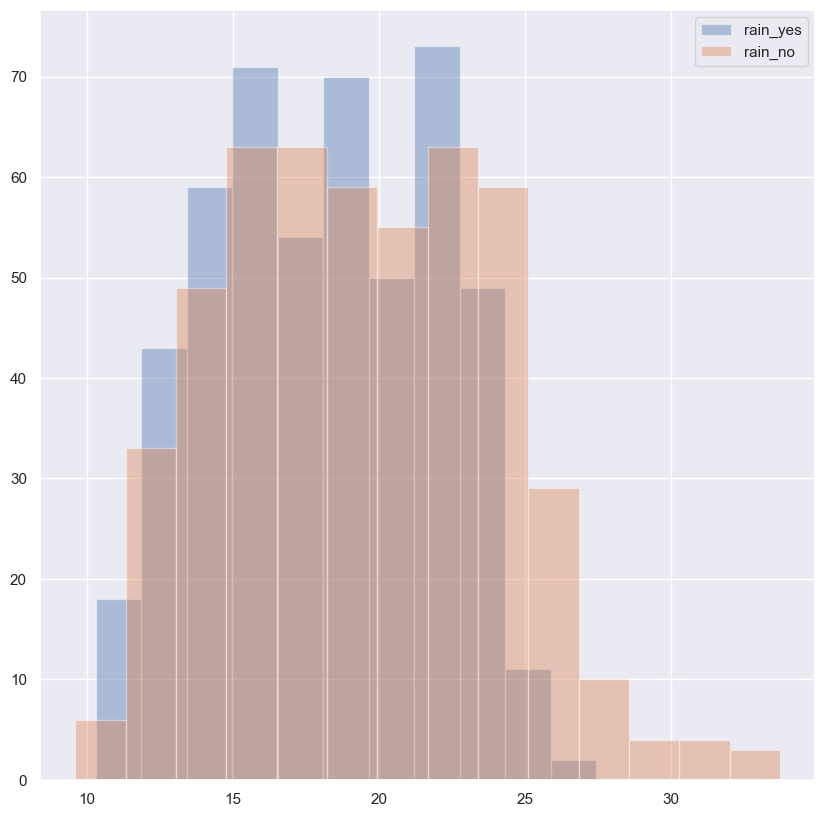

In [148]:
ax = sns.distplot(rain_yes, label='rain_yes', kde=False);
sns.distplot(rain_no, ax=ax, label='rain_no', kde=False);
plt.legend(loc = 'upper right')
plt.xlabel('')
plt.ylabel('')
plt.show();

In [149]:
rain_yes.var()

14.11252355711423

In [150]:
rain_no.var()

20.925223286573132

In [ ]:
# question
#The mean daily temperture in AUSTRALIA is not significantly different between rainy and non-rainy days

In [151]:
t_statistic, p_value = ttest_ind(rain_yes,rain_no)

In [152]:
print(f' T_statistic: {t_statistic}')
print(f' p_value: { p_value}')

 T_statistic: -5.00646419941056
 p_value: 6.551531352611683e-07


In [153]:
alpha = 0.05
if p_value < alpha:
    print('there is a significant differece in mean temperture between rainy and non_rainy days.')
else :
    print('there is no significant differece in mean temperture between rainy and non_rainy days.')

there is a significant differece in mean temperture between rainy and non_rainy days.
